In [1]:
from graphviz import Digraph
from simulateTM import simulateTM
from utils import rf
from tm_to_diagram import tm_to_diagram

### 5.1 (柴田)
#### 問
[JFLAP](http://www.jflap.org/)を使ってすべての"C"を"G"に, すべての"G"を"C"に書き換えるチューリングマシン"SwapCandG"を実装せよ. 複数の入力を使ってマシンをテストせよ. 
#### 答え
- JFLAPはスキップしてdesc(SwapCandG)を示す  
q0->q0: !_CG;R  
q0->q0: C;G,R  
q0->q0: G;C,R  
q0->qH: _;S  



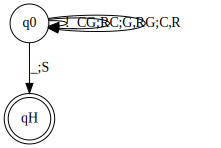

In [25]:
tm_to_diagram(rf('q5_1.tm'))

In [5]:
simulateTM(rf("q5_1.tm"), "CHIBAGA")

'GHIBACA'

### 5.3（冨田）
#### 問
 - 与えられた文字列が'G'が5個以上かつ'T'が高々3個なら受理, それ以外なら拒絶する受理器チューリングマシン.  
 - 前提：インプットは, xで始まりxで終わる遺伝子配列文字列とする.（例:'xCTCGTAx'）  
 （簡単のため. そうでない場合は最初を'_'に置き換え, もし最初の文字が'G'or'T'なら末尾にそれを足す, みたいな操作をすればよさそう.）  

#### 答え
 - アルファベット：{x, C, G, A, T, _}
 - 状態集合：{q_accept, q_reject, q_0, q_1, ..., q_10}
 - 遷移関数は以下の通り：
   - q_0：スタートはxのはずなので1個右に進みq_1へ.
   - q_1-q_5：Gを5個カウントしていく.
     - 1つずつ右に進んでいき, Gがあれば次のステートへ. 途中で終わったら（xに当たったら）拒絶.
   - q_6：スタートに戻る. 戻ったら1個右に進んでq_7へ.
   - q_7-q_9：Tを3個目までカウントしていく.
     - 1つずつ右に進んでいき, Tがあれば次のステートへ. 途中で終わったら（xに当たったら）受理.
   - q_10：1つずつ右に進んでいき, 途中で終わったら受理. TがあればT4つめになるので拒絶.

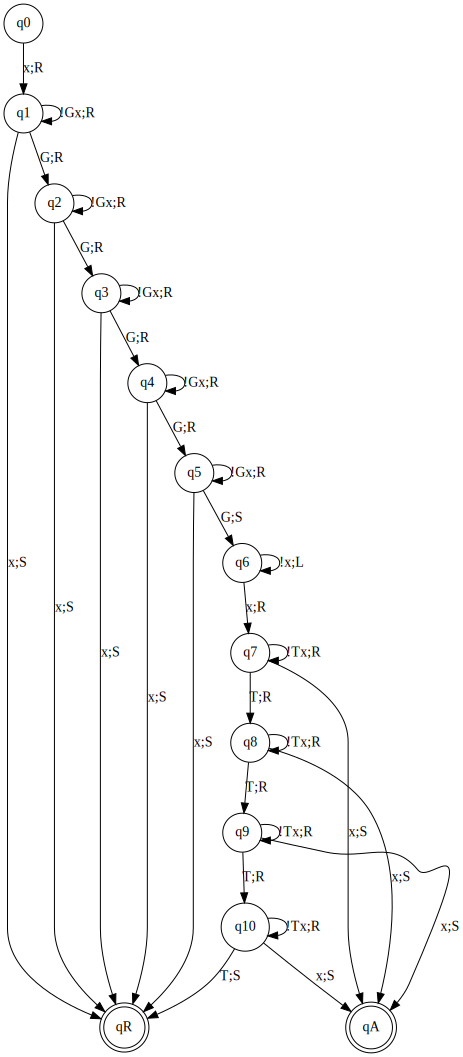

In [8]:
tm_to_diagram(rf('q5_3.tm'))

In [29]:
simulateTM(rf('q5_3.tm'), 'xGGGGGTTTx')

'yes'

In [31]:
simulateTM(rf('q5_3.tm'), 'xGGGGGGTTTTx')

'no'

In [32]:
simulateTM(rf('q5_3.tm'), 'xGGGGTTTx')

'no'

### 5.4 (柳本)

文字列全体の集合を$\Sigma^*$、整数の文字列の集合を$Z$、'HALT'で始まる文字列の集合を$H$

#### (a)
$\Sigma^* \backslash H$
#### (b)
$Z$
#### (c)
$\Sigma^* \backslash (Z \cup H)$
#### (d)
入力を$x$として、
$$100x + 5$$


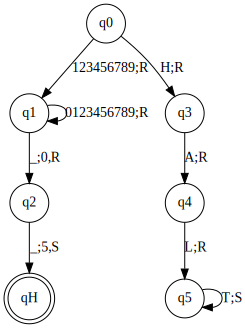

In [4]:
tm_to_diagram(rf('q5_4.tm'))

In [5]:
test_strings = ['123', '12STOP3', 'STOP', 'HALT', 'HALTkun']
for s in test_strings:
    try:
        print(f'{s}: ' + simulateTM(rf('q5_4.tm'), s))
    except:
        print(f'{s}:  Loop')


123: 12305
12STOP3: no
STOP: no
HALT:  Loop
HALTkun:  Loop


### 5.6 (柴田)
#### 問
入力を反転するチューリングマシンを作れ. 入力は"x"記号で境界を区切られた遺伝子文字列だと考えてよい. また, この章で定義した部品を自由に使ってよい.
#### 答え
- 文字列の最後に"A"をつけるappendA, やそれと同様にappendC, appendG, appendTを用意する
- 左端のxからスタートし, 入力を削除し, 反転させた入力のみを残してその左端で止まるdeleteToOutputを用意する
- 以下の手順のアルゴリズムを実行する
    - テープの左端からスタートし,q1として右端の"x"まできたら"x"を追加して左に進む
    - "A, C, G, T"のどれかであれば"y"に置き換えて対応したappendXへ遷移し、その後はyが出るまで左に進み, また同じ状態となる. "x"であればappendxへ遷移し, そのご先頭まで戻ってdeleteToOutputへ遷移する
- ASCIIで記述する  
    - appendA
        - q0->q0: !_;R
        - q0->qH: _;A,S
    - deleteToOutput
        - deleteToOutputを拡張

    - q5_6
        - q0->q1: x;R
        - q1->q1: !x;R
        - q1->q2: x;R
        - q2->q3: ~;x,L
        - q3->q4: ~;L
        - q4->q4: !xACGT;L
        - q4->appendA: A;y,S
        - appendA->q5: A;S
        - q4->appendC: C;y,S
        - appendC->q5: C;S
        - q4->appendG: G;y,S
        - appendG->q5: G;S
        - q4->appendT: T;y,S
        - appendT->q5: T;S
        - q5->q5: !y;L
        - q5->q4: y;L
        - q4->appendx: x;S
        - appendx->q6: x;S
        - q6->q6: !y;L
        - q6->q7: y;L
        - q7->q7: y;L
        - q7->deleteToOutput: x;S
        - deleteToOutput->qH: x;S

In [20]:
simulateTM(rf("q5_6.tm"), "xAAATx")

'xTAAAx'

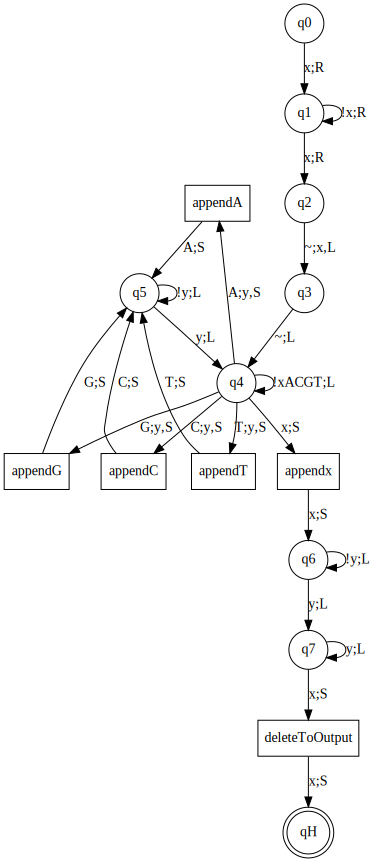

In [3]:
tm_to_diagram(rf('q5_6.tm'))

### 5.8（冨田）
#### 問
 - Cの数がGの数よりも多くない遺伝子文字列を受理するチューリングマシンnoMoreCsThanGsを, MoreCsThanGs（p88図5.7）から作れ.
 
#### 答え
 - 図5.7におけるステート'q_accept'と'q_reject'を取り替えれば良い.

### 5.9 (柳本)
$s^k$

### 5.11 (柴田)
#### 問
一般に, $k$本のテープ, $k$個の独立したヘッドを持ち, アルファベットが$s$個の記号を持つマシン$M$に対して同じシミュレーションを行うとき, 対応するシングルヘッドマシン$M'$は, 何本のテープと何個の記号を必要とするか. 
#### 答え
- $s\ge 2$を仮定する
- $M$の$1$本のテープの情報と対応するヘッドの位置情報を, $2$本のテープで表現すれば, $2k$本のテープを持つシングルヘッドマシン$M'$では, $s$個の記号を必要とする (ヘッドの位置情報については$s$の内の$2$文字を適切に対応させればよい)
- $M$の$1$本のテープの情報と対応するヘッドの位置情報を, まとめて$1$本のテープにおいて末尾の文字を追加することで表現すれば, $k$本のテープのシングルヘッドマシン$M'$は$2s$個の記号を必要とする ($k\le l < 2k$のすべての$l$本のテープの場合に対して同様)

### 5.13（冨田）
#### (a) Q.
 - SHIFT命令を実装するチューリングマシン.
 - 入力はxで囲まれた2進文字列(例：'x11001x'）で, 出力は1bit右にシフトした2進文字列で右端は削除, 左端は0（例：'x01100x'）.

#### A.
 - アルファベット：{x, 0, 1, _}
 - ステート：{q_halt, q_0, q_1, ..., q_6}
 - 遷移関数：
     - q_0：xのはずなので1個右に進みq_1へ.
     - q_1：末尾（x）まで右へ. xがあったら1個左へ戻りq_2へ.
     - q_2：一個左へ戻りq_3へ.
     - q_3：
         - 1だったら右に進み, q_4で1に書き換え, 左に進んでq_2へ.
         - 0だったら右に進み, q_5で0に書き換え, 左に進んでq_2へ.
         - xだったら右に進み, q_6で0に書き換えて終了（q_haltへ）.

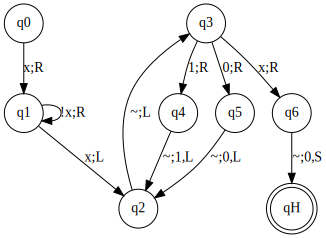

In [19]:
tm_to_diagram(rf('q5_13a.tm'))

In [18]:
simulateTM(rf('q5_13a.tm'), 'x11001x')

'x01100x'

#### (b) Q.
 - AND命令を実装するチューリングマシン.
 - 入力はxで囲まれた区切られた2つの2進文字列.
 - 出力は両方ともゼロでなければ'x1x', そうでなければ'x0x'.
 - 例：'x101x0100x'は'x1x', 'x00x010x'なら'x1x'.

#### A. 
 - 全体と 'x1xTM'('x_x_x'の形の文字列を'x1x'にする)と'x0xTM'（'x0x'にする）からなる.
#### 全体のチューリングマシン
 - q_0：1個進む.
 - q_1：0なら右に進む. xにたどり着いたら'x0xTM'へ. 1にたどり着いたらq_2へ.
 - q_2：xまで進み続ける. xがあったら1個右に進んでq_3へ.
 - q_3：0なら右に進む. xにたどりついたら'x0xTM'へ. 1にたどり着いたら'x1xTM'へ.
 - 'x0xTM'は'x0x'を書いて終了. 'x1xTM'は'x1x'を書いて終了.

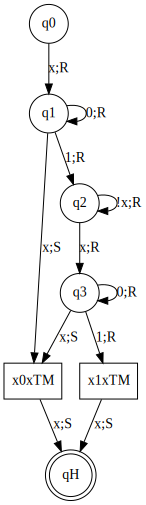

In [26]:
tm_to_diagram(rf('q5_13b.tm'))

#### x1xTM
 - q_0で末尾まで進む.
 - q_1でxを消す.
 - q_2で数字を消していく. xにたどり着いたらそれを消して左に進みq_3へ.
 - q_3で数字を消していく. xにたどりいついたらそれは消さずに右に進みq_4へ.
 - q_4で1を書く.
 - q_5で'x'を書いて終了.
#### x0xTM
 - x1xTM はq_4で, 0を書くようにしたもの（遷移図省略）

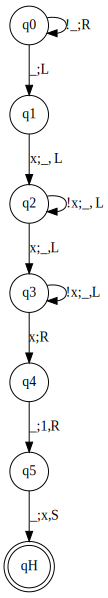

In [21]:
tm_to_diagram(rf('x1xTM.tm'))

In [27]:
simulateTM(rf('q5_13b.tm'), 'x101x0100x')

'x1x'

In [28]:
simulateTM(rf('q5_13b.tm'), 'x00x010x')

'x0x'

### 5.14 (柳本)
$$
\begin{matrix}
\text{テープ } A_1 & a & b & c & a & d \\
\text{テープ } A_2 & ␣ & x & ␣ & ␣ & ␣ \\
\text{テープ } B_1 & ␣ & ␣ & a & c & b \\
\text{テープ } B_2 & ␣ & ␣ & x & ␣ & ␣ \\
\text{テープ } C_1 & ␣ & c & b & ␣ & ␣ \\
\text{テープ } C_2 & x & ␣ & ␣ & ␣ & ␣ \\
\end{matrix}
$$

### 5.16 (柴田)
#### 問
演習問題5.2のbinaryDecrementerチューリングマシンについて考える. 図5.17で提案した記法を使って, このマシンのASCII記述, desc(binaryDecrementer)を示せ
#### 答え
q0->q1: x;R  
q1->q1: 01;R  
q1->q2: x;L    
q2->q2: 0;1,L  
q2->qH: 1;0,S

In [15]:
simulateTM(rf("binaryDecrementer.tm"), "x010x")

'x001x'

### 5.18（冨田）
#### (a) $10^{t-1} -1$
 - 1ステップ目からt-1ステップ目まで, アドレステープの今のセルに'9'を書きヘッドを右にずらすというのを繰り返すと, $n = 10^{t-1}-1 = 99...9$ ($t-1$桁)となる.
 - tステップ目でRAM$[n]$になんらかの記号を書き込む.
 
#### (b) $⌊t/2⌋$個
 - 1ステップでRAMテープの異なるセルに記号を書き込むには, その前に1ステップ使ってアドレステープを書き換えることが必要.
 - 例えば, 奇数ステップ目で今のアドレステープのセルに1を書いてヘッドを右にずらし, 偶数ステップ目でRAMに記号'a'書き込むというふうに.
 - したがって, 書き込めるセル数は最大で, $t$ が偶数なら $t/2$, 奇数なら $(t-1)/2$.

#### (c) $O(t^2)$
 - (抜粋10.4で使うのはこの $O(t^2)$ のオーダーであるという事実なのでこれを答えとした.)
 - (a)から最大で書き込めるセルの10進数での桁数は $t-1$ 桁なので, 1つのRAMセルの内容の記録に必要な文字数は区切り':',';'と記号分を合わせて $t+2$.
 - (b)より書き込めるセル数は $t/2$ 以下なので, Tの空白記号でないセル数の上限は $(t+2)\cdot t/2 = \frac{t^2}{2}+t$ 未満.
 - (b)の例のように書き込めば, '1:a;11:a; ... ;11...1:a'となり, 数字部分だけで $1+2+\dots+(t/2) = \frac{t^2}{8}+\frac{t}{4}$となるので, 上限は少なくともこれ以上.
 - したがって, Tの空白記号でないセル数の上限は $O(t^2)$.

### 5.19 (柳本)
5.7節の記述から、量子コンピュータとPythonプログラムはチューリング等価である。したがって、この二つの解ける問題の集合は同じである。PythonプログラムにYesOnString問題が解けないことは示されているため、量子コンピュータであっても解けない。